<a href="https://colab.research.google.com/github/luizfilipisousamoura/QuantumComputing/blob/main/QuantumComputingWithQiskit/07_ryGateOnState0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 5.0 MB/s 
     |████████████████████████████████| 19.2 MB 1.2 MB/s 
     |████████████████████████████████| 240 kB 56.0 MB/s 
     |████████████████████████████████| 106 kB 42.9 MB/s 
     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 49 kB 5.1 MB/s 
     |████████████████████████████████| 943 kB 42.4 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 4.0 MB 35.7 MB/s 
     |████████████████████████████████| 1.9 MB 45.8 MB/s 
     |████████████████████████████████| 112 kB 63.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.0-py3-none-any.whl size=12188 sha256=2d1c335ab846a3b88d3afe9f80bbb0bf7a9d3bbc2e2e75a7f5f41c19f59adc74
  Stored in directory: /root/.cache/pip/wheels/63/d0/9a/25714

In [2]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 5.0 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=36549dd95662880219614daa0b5b214c4bd36555daa9f47a251851570406e477
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

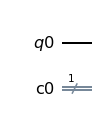

In [4]:
qc.draw('mpl')

In [5]:
from qiskit.quantum_info import Statevector

In [6]:
psi1 = Statevector(qc)
psi1.draw('latex')

<IPython.core.display.Latex object>

In [7]:
from qiskit.visualization import plot_state_qsphere

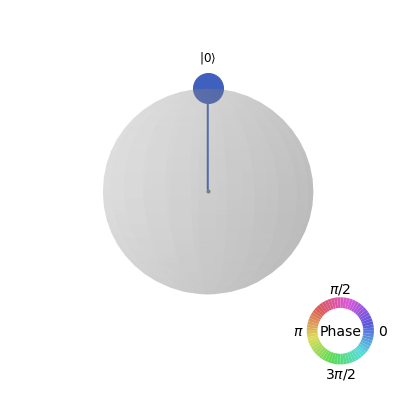

In [8]:
plot_state_qsphere(qc)

In [9]:
from qiskit.quantum_info import DensityMatrix

In [10]:
rho1 = DensityMatrix(qc)
rho1.draw('latex',prefix='\\rho_1 = ')

<IPython.core.display.Latex object>

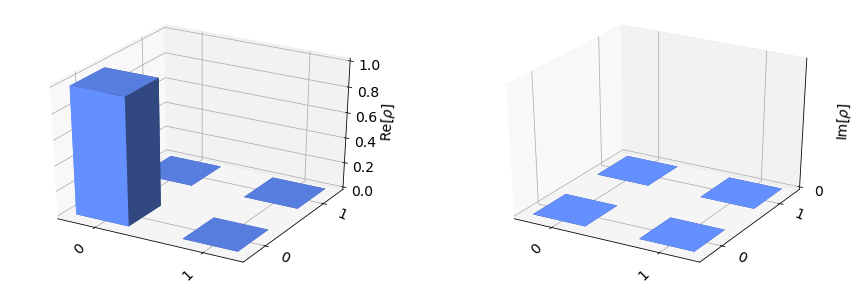

In [11]:
from qiskit.visualization import plot_state_city
plot_state_city(qc)

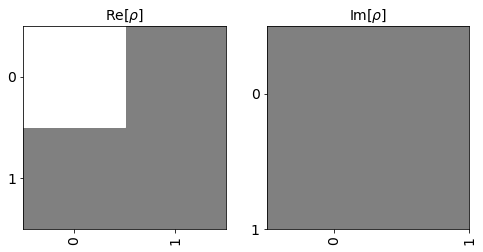

In [12]:
from qiskit.visualization import plot_state_hinton
plot_state_hinton(qc)

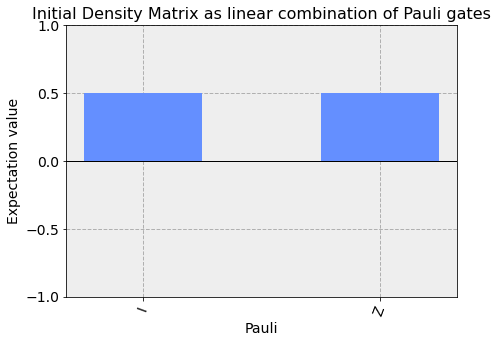

In [13]:
from qiskit.visualization import plot_state_paulivec
plot_state_paulivec(qc,title='Initial Density Matrix as linear combination of Pauli gates')

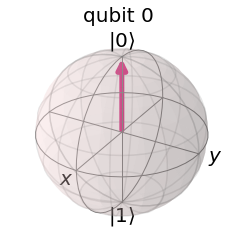

In [14]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(qc)

In [15]:
purity = rho1.purity()
print(purity)

(1+0j)


In [16]:
from math import pi

In [17]:
qc.ry(pi/3, q[0])

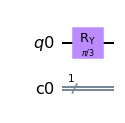

In [18]:
qc.draw('mpl')

In [19]:
psi2 = Statevector(qc)
psi2.draw('latex')

<IPython.core.display.Latex object>

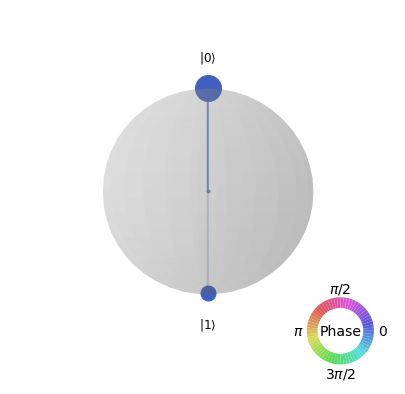

In [20]:
plot_state_qsphere(qc)

In [21]:
rho2 = DensityMatrix(qc)
rho2.draw('latex',prefix='\\rho_2=')

<IPython.core.display.Latex object>

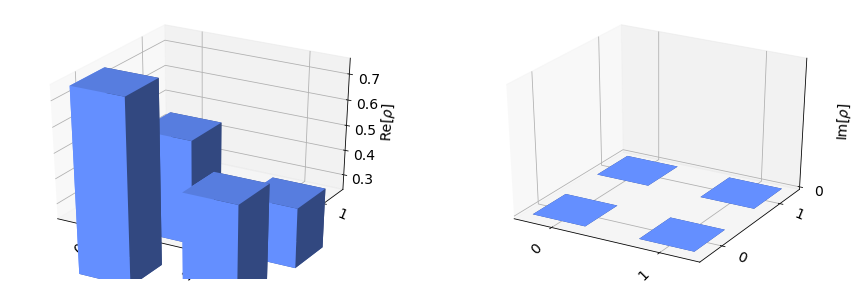

In [22]:
plot_state_city(qc)

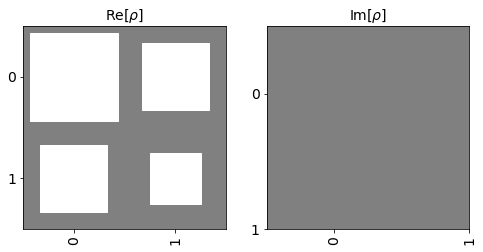

In [23]:
plot_state_hinton(qc)

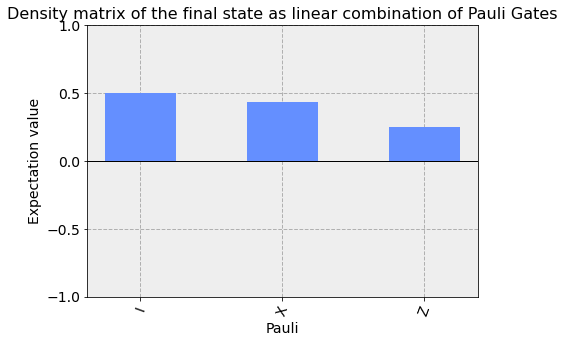

In [24]:
plot_state_paulivec(qc, title = 'Density matrix of the final state as linear combination of Pauli Gates')

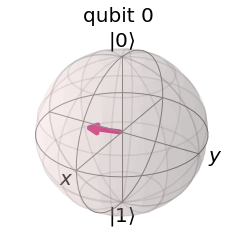

In [25]:
plot_bloch_multivector(qc)

In [26]:
purityf = rho2.purity()
print(purityf)

(1.0000000000000002+0j)


In [27]:
from qiskit.quantum_info import state_fidelity

In [28]:
fidelity = state_fidelity(psi1,psi2)
print(fidelity)

0.7500000000000001


In [29]:
fidelity = state_fidelity(rho1,rho2)
print(fidelity)

0.7500000000000003


In [30]:
qc.measure(q[0],c[0])

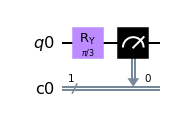

In [31]:
qc.draw('mpl')

In [32]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'1': 245, '0': 779}


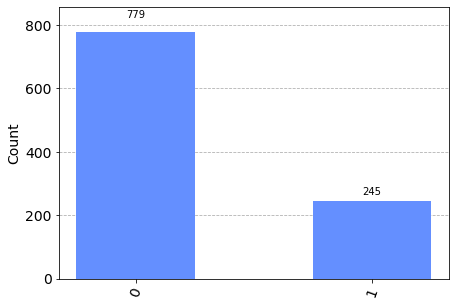

In [33]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)